<a href="https://colab.research.google.com/github/jeydion/sliderule_dsi_inferential_statistics_exercise_1/blob/master/sliderule_dsi_inferential_statistics_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
url = "https://raw.githubusercontent.com/jeydion/sliderule_dsi_inferential_statistics_exercise_1/master/human_body_temperature.csv"
df = pd.read_csv(url)

In [5]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


1.  Is the distribution of body temperatures normal? 
##Visual check with histogram

<p><b>Answer</b> There seems to be a discrepancy between the visual normality check and the SciPy normal test check. Visually the distributions are not normal. However, when calculating using the p-test, the p-value fails to reject the null hypothesis, tpyically meaning the data is normally distributed. Since visually the data is not normally distributed I will conclude that the p-value is not accurate for this dataset. </p>

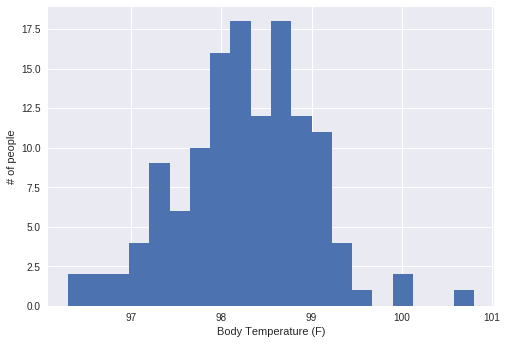

In [6]:
bt = df.temperature
_ = plt.hist(bt, bins=20)
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('# of people')
plt.show()

In [7]:
df_m = df[df['gender'] == 'M']
df_m.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [8]:
df_f = df[df['gender'] == 'F']
df_f.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


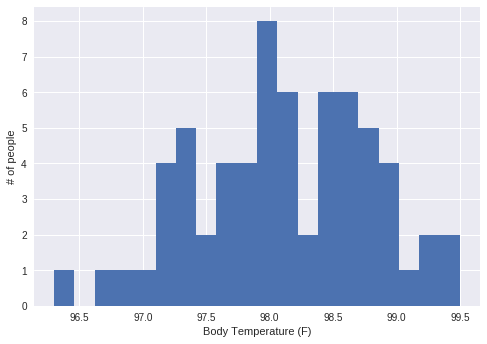

In [9]:
_ = plt.hist(df_m.temperature, bins=20)
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('# of people')
plt.show()

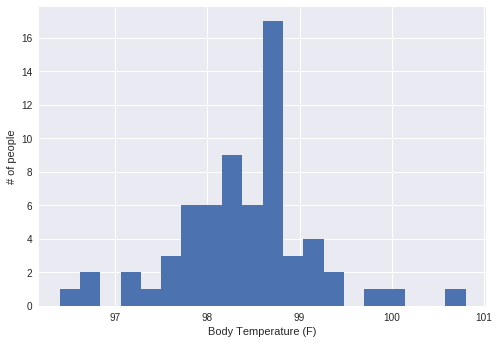

In [10]:
_ = plt.hist(df_f.temperature, bins=20)
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('# of people')
plt.show()

Graphically, the body temperatures are not normally distributed. Even after sorting the temperatures by gender, they are not normally distributed. Below I will use scipy to numerically check for normality

In [0]:
#all temperatures
def check_normal(col):
    alpha = 0.05
    stat, p = stats.normaltest(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if (p > alpha):
        print('Fail to reject null hypothesis. Distribution is normal.')
    else:
        print('Reject the null hypothesis. Distribution is not normal.')

In [12]:
check_normal(bt)

Statistics=2.704, p=0.259
Fail to reject null hypothesis. Distribution is normal.


In [13]:
check_normal(df_m.temperature)

Statistics=0.891, p=0.640
Fail to reject null hypothesis. Distribution is normal.


In [14]:
check_normal(df_f.temperature)

Statistics=4.735, p=0.094
Fail to reject null hypothesis. Distribution is normal.


2. Is the dataset large? Are the variables independent?

<p><b>Answer</b> The dataset isn't very large considering there are only 130 samples; split evenly between male and female. Since p is very close to zero, the null hypothesis has failed to be rejected and the variables are independent.</p>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [16]:
# Pearson r test to check for variable independence between temperature and heart rate
temp = df.temperature
hr = df.heart_rate
gender = df.gender
corr, p = stats.pearsonr(temp, hr)
print(corr, p)

0.2536564027207642 0.003591489250708233


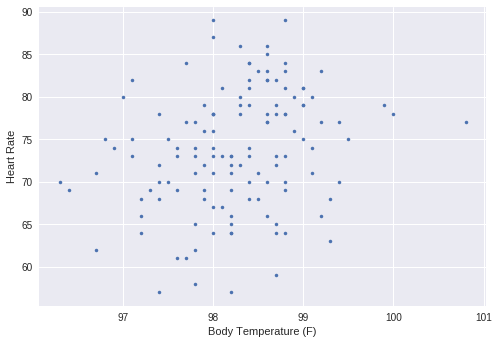

In [17]:
_ = plt.plot(temp, hr, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('Heart Rate')
plt.show()

3. Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
      <b>Answer</b> The first bootstrap hypothesis test failed to reject the null hypothesis. After using frequentist statistical testing, the null hypothsis is rejected. One-sample test was used since we are comparing the perceived true population mean of 98.6 to the dataset mean of 98.25. Since the male and female samples are equal in count, I did not run a two-sample test. I used a t-test because we are comparing the known means of body temperature between the unknown true population dataset and the known provided dataset. Z-test was not done because the standard deviation of the true population is not known. When the z-score is calculated, the number is 5.48 which is well beyond the range of z-scores. This further suggests that the distribution is not normal. 

In [18]:
# Null Hypothesis: True population mean is 98.6 degrees
# Test Statistic: temp (body temperature column)
np.mean(temp)

98.24923076923078

In [19]:
temp_m = df_m.temperature
np.mean(temp_m)


98.1046153846154

In [20]:
temp_f = df_f.temperature
np.mean(temp_f)

98.39384615384613

In [0]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

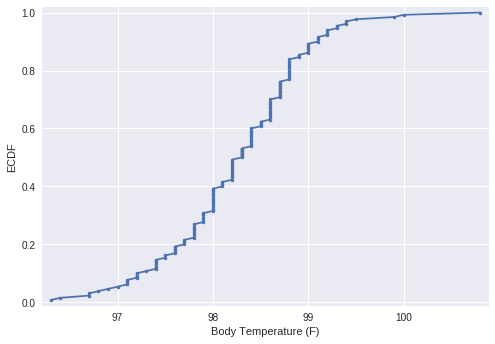

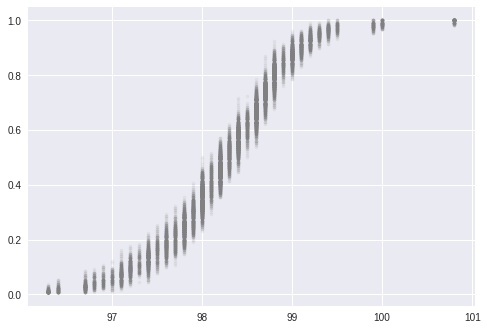

In [22]:
def bt_bs_draw(temp):
    for _ in range(130):
    # Generate bootstrap sample: bs_sample
        bs_sample = np.random.choice(temp, size=len(temp))
    # Compute and plot ECDF from bootstrap sample
        x, y = ecdf(bs_sample)
        _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(temp)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()
bt_bs_draw(temp)

In [0]:
# define function that makes bootstraps replicates from data

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [0]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [25]:
# One-sample t test will be used since only the temperature is being compared to 98.6. 

#translate temp array such that its mean is 98.6
translated_temp = temp - np.mean(temp) + 98.6

# Take bootstrap replicates of translated temp array
temp_replicates = draw_bs_reps(translated_temp, np.mean, 130)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(temp_replicates <= np.mean(temp)) / 130

# Print the p-value
print('p=%.3f' % p)
if (p > 0.05):
    print('Fail to reject null hypothesis')
else:
    print('Reject null hypothesis' )


p=0.000
Reject null hypothesis


In [45]:
#Population standard deviation
pop_std = np.std(temp) / np.sqrt(130)
print('poplation standard deviation', pop_std)
z_score = (98.6 - np.mean(temp)) / pop_std
print('z-score', z_score)

poplation standard deviation 0.06405661469519336
z-score 5.475925202078116


4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
    <p><b>Answer </b> The results are the same with a smaller sample. Since t-tests work best with small samples, this only reaffirms the results that were found in Question 3. Z-test is still not appropriate because the standard deviation of the population is not known, as well as the dataset provided is not enough of the population to give a good comparision. </p>

5. At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
    <p><b>Answer</b> The rule of thumb for outliers would be 1.5 of the mean. This would be the 'abnormal' body temperature. Any temperature above and below the following confidence interval will be 'abnormal' body temperature according the dataset. The confidence interval will be [97.52, 98.99] with standard margin of error is 0.06. 


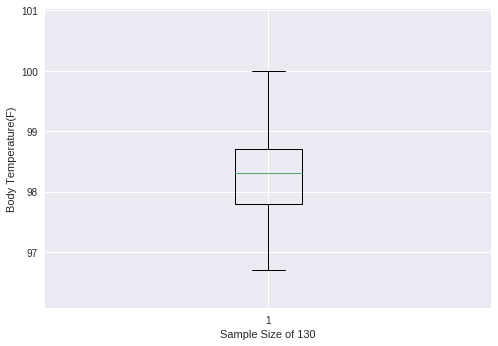

In [46]:
_ = plt.boxplot(temp)
_ = plt.xlabel('Sample Size of 130')
_ = plt.ylabel('Body Temperature(F)')
plt.show()

In [32]:
temp_mean = np.mean(temp)
print('Mean of Body Temperature=' + str(temp_mean))

Mean of Body Temperature=98.24923076923078


In [33]:
temp_std = np.std(temp)
print('Standard Deviation of Body Temperature=' + str(temp_std))

Standard Deviation of Body Temperature=0.7303577789050377


Any temperature above and below the following confidence interval will be 'abnormal' body temperature according the dataset. The confidence interval will be [97.52, 98.99] with standard margin of error is 0.06. 



In [35]:
lower_bound = temp_mean - temp_std
lower_bound

97.51887299032575

In [36]:
upper_bound = temp_mean + temp_std
upper_bound

98.97958854813581

In [38]:
temp_sem = temp_std / np.sqrt(130)
temp_sem

0.06405661469519336

**6**. Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>
<p><b>Answer</b> Based on comparisons from above, there isn't significant change between the male and female in normal temperature. Mean values for both male and female are well within the confidence interval. I took the frequentist approach by comparing the means of both groups to the dataset mean and standard deviation. Based on the statistical analyses, I believe that the dataset that was used for this exercise was not large enough in either quantity or cross-sectionality. Neither male or female data was normally distributed and the sample size of each were so small, compared to the population from which this data represents. I would insist on more data from the source. I further claim that with a larger dataset the body temperature distribution would approach normality. 

In [48]:
temp_m_mean = np.mean(temp_m)
temp_f_mean = np.mean(temp_f)
print('Male mean body temp= %.2f Female mean body temp= %.2f' % (temp_m_mean, temp_f_mean))

Male mean body temp= 98.10 Female mean body temp= 98.39
